## Integrantes:
- Paola Flores
- Mario Rivera

In [ ]:
# """
# CORRER SOLO UNA VEZ, ES PARA DESCOMPRIMIR EL ARCHIVO BD.ZIP
# """

# import zipfile
# import os

# # Directorio donde se extraerán los archivos
# current_directory = os.getcwd()
# # Ruta del archivo .zip
# zip_path = os.path.join(current_directory, 'BD.zip')

# # Descomprimir en el directorio actual 
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(current_directory)

# print(f'Archivos extraídos en: {current_directory}')

Archivos extraídos en: c:\Users\mrive\OneDrive - Universidad Adolfo Ibanez\Semestre 10\Reconocimiento de patrones en imágenes\Tareas\Tarea 4


## Pre-procesamiento

In [14]:
import cv2
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

np.random.seed(42)

directorio_texturas = 'BD'
print(f'Directorio de texturas: {directorio_texturas}')

resultados = []


for folder in sorted(os.listdir(directorio_texturas)):
    
    folder_path = os.path.join(directorio_texturas, folder)

    if os.path.isdir(directorio_texturas):
        for image_name in os.listdir(folder_path):
            
            image_path = os.path.join(folder_path, image_name)
            print(f"Procesando imagen: {image_name} del folder: {folder}")
            image = cv2.imread(f'{image_path}')
            
            features = ['contrast', 'energy', 'ASM', 'homogeneity', 'correlation', 'dissimilarity']
            ft_map = {
                "contrast": "Contraste",
                "energy": "Energía",
                "ASM": "ASM",
                "homogeneity": "Homogeneidad",
                "correlation": "Correlación",
                "dissimilarity": "Disimilaridad"
            }
            
            # Diccionario para almacenar resultados en formato de columnas
            resultados_fila = {'Carpeta': folder, 'Imagen': image_name}
            
            # Para los descriptores de los canales RGB
            canales = cv2.split(image)  # Separar los canales RGB
            nombres_canales = ['R', 'G', 'B']
            for canal, nombre_canal in zip(canales, nombres_canales):
                glcm = graycomatrix(canal, 
                                    distances=[1],
                                    angles=[0],
                                    levels=256,
                                    symmetric=False,
                                    normed=False)

                # Guardar los valores de cada descriptor como columnas separadas
                for ft in features:
                    if ft in ft_map:
                        ft_values = float(graycoprops(glcm, ft))
                        # Crear columnas como 'Contraste R', 'Energía R', etc.
                        resultados_fila[f'{ft_map[ft]} {nombre_canal}'] = ft_values
            
            # Para los descriptores de la imagen en escala de grises
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, 
                                distances=[1],
                                angles=[0],
                                levels=256,
                                symmetric=False,
                                normed=False)
            
            # Guardar los valores de descriptores de la imagen en escala de grises
            for ft in features:
                if ft in ft_map:
                    ft_values = float(graycoprops(glcm, ft))
                    # Crear columnas como 'Contraste Gray', 'Energía Gray', etc.
                    resultados_fila[f'{ft_map[ft]} Gray'] = ft_values
            
            # Añadir la fila con todos los descriptores para esta imagen
            resultados.append(resultados_fila)


Directorio de texturas: BD
Procesando imagen: c264-1_1.jpg del folder: textura_01
Procesando imagen: c264-1_10.jpg del folder: textura_01
Procesando imagen: c264-1_11.jpg del folder: textura_01
Procesando imagen: c264-1_12.jpg del folder: textura_01
Procesando imagen: c264-1_13.jpg del folder: textura_01
Procesando imagen: c264-1_14.jpg del folder: textura_01
Procesando imagen: c264-1_15.jpg del folder: textura_01
Procesando imagen: c264-1_16.jpg del folder: textura_01
Procesando imagen: c264-1_17.jpg del folder: textura_01
Procesando imagen: c264-1_18.jpg del folder: textura_01
Procesando imagen: c264-1_19.jpg del folder: textura_01
Procesando imagen: c264-1_2.jpg del folder: textura_01
Procesando imagen: c264-1_20.jpg del folder: textura_01
Procesando imagen: c264-1_21.jpg del folder: textura_01
Procesando imagen: c264-1_22.jpg del folder: textura_01
Procesando imagen: c264-1_23.jpg del folder: textura_01
Procesando imagen: c264-1_24.jpg del folder: textura_01
Procesando imagen: c264

In [15]:


df_resultados = pd.DataFrame(resultados)

df_resultados = df_resultados.sort_values(by=['Carpeta', 'Imagen'])
display(df_resultados)

,Carpeta,Imagen,Contraste R,Energía R,ASM R,Homogeneidad R,Correlación R,Disimilaridad R,Contraste G,Energía G,...,ASM B,Homogeneidad B,Correlación B,Disimilaridad B,Contraste Gray,Energía Gray,ASM Gray,Homogeneidad Gray,Correlación Gray,Disimilaridad Gray
0,textura_01,c264-1_1.jpg,73.323855,0.018066,0.000326,0.169128,0.979387,6.281124,73.770297,0.018069,...,0.000337,0.170204,0.979984,6.256659,72.717783,0.018293,0.000335,0.171963,0.980319,6.228369
1,textura_01,c264-1_10.jpg,72.781012,0.017860,0.000319,0.173032,0.981427,6.227181,74.116916,0.017814,...,0.000330,0.171987,0.981730,6.235149,72.961799,0.018043,0.000326,0.173632,0.982020,6.217028
2,textura_01,c264-1_11.jpg,76.484996,0.017620,0.000310,0.164916,0.979709,6.426490,78.772112,0.017553,...,0.000324,0.164605,0.979713,6.489189,77.661157,0.017840,0.000318,0.165036,0.980337,6.454249
3,textura_01,c264-1_12.jpg,76.417462,0.018037,0.000325,0.168423,0.979401,6.384723,78.983727,0.017892,...,0.000335,0.167323,0.979493,6.453896,77.875534,0.018150,0.000329,0.168246,0.979917,6.428627
4,textura_01,c264-1_13.jpg,70.783791,0.017601,0.000310,0.170655,0.978225,6.198731,72.177847,0.017474,...,0.000316,0.170540,0.978840,6.224145,71.334667,0.017650,0.000312,0.171135,0.979125,6.213735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,textura_10,a642-1_50.jpg,57.154394,0.021075,0.000444,0.188819,0.968014,5.484064,58.563711,0.020279,...,0.000525,0.190765,0.957554,5.397799,56.971165,0.021180,0.000449,0.189475,0.967332,5.470538
496,textura_10,a642-1_6.jpg,128.699791,0.015942,0.000254,0.142701,0.957545,8.007679,130.106410,0.015499,...,0.000306,0.144921,0.937677,7.891277,127.797301,0.016098,0.000259,0.142745,0.954123,7.979663
497,textura_10,a642-1_7.jpg,116.381349,0.016112,0.000260,0.149712,0.963461,7.545719,117.530137,0.015580,...,0.000314,0.150912,0.945628,7.449253,115.539647,0.016187,0.000262,0.149514,0.960402,7.515871
498,textura_10,a642-1_8.jpg,102.844980,0.016882,0.000285,0.155776,0.964791,7.192000,103.627984,0.016480,...,0.000349,0.156866,0.944865,7.105847,102.051550,0.017143,0.000294,0.155840,0.961583,7.158731


In [16]:
df_resultados.describe()

,Contraste R,Energía R,ASM R,Homogeneidad R,Correlación R,Disimilaridad R,Contraste G,Energía G,ASM G,Homogeneidad G,...,ASM B,Homogeneidad B,Correlación B,Disimilaridad B,Contraste Gray,Energía Gray,ASM Gray,Homogeneidad Gray,Correlación Gray,Disimilaridad Gray
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123.500572,0.022126,0.000560,0.175592,0.936818,7.410997,125.916337,0.021195,0.000526,0.174647,...,0.000562,0.175109,0.936337,7.429215,124.602059,0.021490,0.000540,0.176130,0.938157,7.428759
std,98.265373,0.008377,0.000453,0.064397,0.051537,3.163647,99.503661,0.008760,0.000478,0.066786,...,0.000501,0.065834,0.050902,3.211639,99.380076,0.008823,0.000486,0.067689,0.051291,3.210980
min,8.937269,0.010937,0.000120,0.064650,0.743754,2.134667,8.823855,0.010264,0.000105,0.064748,...,0.000109,0.068068,0.745449,2.121317,8.765928,0.010311,0.000106,0.065093,0.745386,2.113237
25%,61.940406,0.016206,0.000263,0.132436,0.908752,5.513141,64.440474,0.015578,0.000243,0.130280,...,0.000263,0.130576,0.912407,5.478490,61.612321,0.015813,0.000250,0.130932,0.910245,5.483329
50%,94.292827,0.019146,0.000367,0.170051,0.960511,6.497880,98.732193,0.017975,0.000323,0.169372,...,0.000341,0.170354,0.953054,6.623422,96.512016,0.018295,0.000335,0.170712,0.959197,6.590112
75%,139.880329,0.027257,0.000743,0.222190,0.974806,8.380570,143.535779,0.025462,0.000648,0.221918,...,0.000739,0.221754,0.976962,8.392321,141.112586,0.026307,0.000692,0.224361,0.978780,8.398647
max,476.392594,0.050418,0.002542,0.404480,0.994417,16.445478,485.563165,0.049961,0.002496,0.401655,...,0.003791,0.398011,0.990189,16.498554,481.990217,0.055087,0.003035,0.406928,0.992369,16.537815


In [17]:
            
from sklearn.preprocessing import StandardScaler
columnas = ["Contraste R", "Energía R", "ASM R", "Homogeneidad R", "Correlación R", "Disimilaridad R",
            "Contraste G", "Energía G", "ASM G", "Homogeneidad G", "Correlación G", "Disimilaridad G",
            "Contraste B", "Energía B", "ASM B", "Homogeneidad B", "Correlación B", "Disimilaridad B",
            "Contraste Gray", "Energía Gray", "ASM Gray", "Homogeneidad Gray", "Correlación Gray", "Disimilaridad Gray"]

scaler = StandardScaler()
df_resultados[columnas] = scaler.fit_transform(df_resultados[columnas])

display(df_resultados)

,Carpeta,Imagen,Contraste R,Energía R,ASM R,Homogeneidad R,Correlación R,Disimilaridad R,Contraste G,Energía G,...,ASM B,Homogeneidad B,Correlación B,Disimilaridad B,Contraste Gray,Energía Gray,ASM Gray,Homogeneidad Gray,Correlación Gray,Disimilaridad Gray
0,textura_01,c264-1_1.jpg,-0.511136,-0.485043,-0.515518,-0.100471,0.826821,-0.357500,-0.524586,-0.357184,...,-0.448914,-0.074575,0.858318,-0.365462,-0.522602,-0.362768,-0.422412,-0.061626,0.822854,-0.374213
1,textura_01,c264-1_10.jpg,-0.516666,-0.509711,-0.531914,-0.039787,0.866440,-0.374568,-0.521099,-0.386267,...,-0.464446,-0.047466,0.892659,-0.372166,-0.520144,-0.391103,-0.441121,-0.036944,0.856048,-0.377749
2,textura_01,c264-1_11.jpg,-0.478934,-0.538404,-0.550749,-0.165942,0.833072,-0.311505,-0.474268,-0.416044,...,-0.476062,-0.159710,0.852990,-0.292987,-0.472810,-0.414121,-0.456129,-0.164069,0.823189,-0.303797
3,textura_01,c264-1_12.jpg,-0.479622,-0.488624,-0.517910,-0.111431,0.827078,-0.324721,-0.472140,-0.377318,...,-0.453912,-0.118382,0.848666,-0.303987,-0.470651,-0.378930,-0.433114,-0.116601,0.814999,-0.311785
4,textura_01,c264-1_13.jpg,-0.537011,-0.540709,-0.552251,-0.076734,0.804249,-0.383570,-0.540606,-0.425162,...,-0.492078,-0.069466,0.835830,-0.375596,-0.536533,-0.435642,-0.470008,-0.073873,0.799545,-0.378776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,textura_10,a642-1_50.jpg,-0.675850,-0.125611,-0.255233,0.205614,0.605913,-0.609696,-0.677564,-0.104647,...,-0.074171,0.238048,0.417225,-0.633150,-0.681209,-0.035225,-0.187475,0.197350,0.569395,-0.610462
496,textura_10,a642-1_6.jpg,0.052963,-0.738855,-0.675217,-0.511269,0.402575,0.188795,0.042152,-0.650816,...,-0.510973,-0.459006,0.026348,0.144015,0.032184,-0.611759,-0.578014,-0.493709,0.311604,0.171741
497,textura_10,a642-1_7.jpg,-0.072522,-0.718563,-0.663183,-0.402281,0.517490,0.042627,-0.084365,-0.641571,...,-0.495383,-0.367910,0.182715,0.006245,-0.091281,-0.601622,-0.572067,-0.393600,0.434139,0.027157
498,textura_10,a642-1_8.jpg,-0.210413,-0.626596,-0.607044,-0.308020,0.543326,-0.069292,-0.224220,-0.538728,...,-0.424800,-0.277375,0.167696,-0.100787,-0.227139,-0.493230,-0.506418,-0.300051,0.457193,-0.084179


## Selección de características

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X = df_resultados[columnas]
y = df_resultados['Carpeta']

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LDA maximiza el índice de Fisher
lda = LDA()

best_k_features = None
best_accuracy = 0
best_selected_features = None

# Plus L = 2 y Take Away R = 1
L = 2 
R = 1 

current_k = L

iter_caract = []

# Ciclo de Plus L, Take Away R
while current_k <= 24:  # Definir un máximo de características seleccionadas (6)
    print(f"Prueba de {current_k} características iniciales (SFS)")

    # Vamos agregando características (Plus L)
    sfs = SFS(lda, 
              k_features=current_k,  # Vamos cambiando el número de características de forma creciente para encontrar el mejor
              forward=True, 
              floating=False, 
              scoring='accuracy', 
              cv=5)  # Validación cruzada
    
    sfs = sfs.fit(X_train, y_train)

    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Entrenamos y predecimos
    lda.fit(X_train_sfs, y_train)
    y_pred_sfs = lda.predict(X_test_sfs)

    # Calcularmos accuracy como medida de desempeño
    test_accuracy_sfs = accuracy_score(y_test, y_pred_sfs)

    selected_feature_names = list(sfs.k_feature_names_)

    print(f"Características seleccionadas con SFS: {selected_feature_names}")
    print(f"Precisión de validación cruzada con SFS: {sfs.k_score_}")
    print(f"Precisión en conjunto de prueba con SFS: {test_accuracy_sfs}")


    X_train_numpy = X_train.to_numpy() # para poder seleccionar solo las columnas de SFS en las siguientes lineas (X_train_sfs_subset y X_test_sfs_subset)
    X_test_numpy = X_test.to_numpy()

    # Aplicamos SBS sobre las características seleccionadas por SFS
    selected_features_indices = list(sfs.k_feature_idx_)
    X_train_sfs_subset = X_train_numpy[:, selected_features_indices]  # Subset con las características seleccionadas por SFS
    X_test_sfs_subset = X_test_numpy[:, selected_features_indices]   
    
    sbs = SFS(lda,
              k_features=(current_k - R),  # Reducimos el número de características en R cada vez
              forward=False,  # Ahora hacemos SBS
              floating=False, 
              scoring='accuracy', 
              cv=5)

    sbs = sbs.fit(X_train_sfs_subset, y_train)

    X_train_sbs = sbs.transform(X_train_sfs_subset)
    X_test_sbs = sbs.transform(X_test_sfs_subset)

    # Entrenamos y predecimos con el modelo ajustado por SBS
    lda.fit(X_train_sbs, y_train)
    y_pred_sbs = lda.predict(X_test_sbs)

    # Recalculamos accuracy con SBS
    test_accuracy_sbs = accuracy_score(y_test, y_pred_sbs)

    # Mapear los índices de SBS a los nombres de las características originales
    sbs_feature_indices = list(sbs.k_feature_idx_)
    sbs_feature_names = [selected_feature_names[i] for i in sbs_feature_indices]

    print(f"Características seleccionadas con SBS (después de SFS): {sbs_feature_names}")
    print(f"Precisión de validación cruzada con SBS: {sbs.k_score_}")
    print(f"Precisión en conjunto de prueba con SBS: {test_accuracy_sbs}")


    # Guardamos los resultados de la iteración en un diccionario
    iter_caract.append({
        'k_features': current_k,
        'selected_features_sfs': sfs.k_feature_names_,
        'selected_features_sbs': sbs.k_feature_names_,
        'cross_val_score_sfs': sfs.k_score_,
        'cross_val_score_sbs': sbs.k_score_,
        'test_accuracy_sfs': test_accuracy_sfs,
        'test_accuracy_sbs': test_accuracy_sbs
    })

    # Vamos comparando y guardamos el mejor resultado entre SFS + SBS
    if test_accuracy_sbs > best_accuracy:
        best_k_features = current_k
        best_accuracy = test_accuracy_sbs
        best_selected_features = sbs_feature_names

    print("-" * 50)

    # Siguiente iteración +L (plus L)
    current_k += L
    





Prueba de 2 características iniciales (SFS)
Características seleccionadas con SFS: ['Homogeneidad G', 'Homogeneidad B']
Precisión de validación cruzada con SFS: 0.7025
Precisión en conjunto de prueba con SFS: 0.56
Características seleccionadas con SBS (después de SFS): ['Homogeneidad B']
Precisión de validación cruzada con SBS: 0.43
Precisión en conjunto de prueba con SBS: 0.3
--------------------------------------------------
Prueba de 4 características iniciales (SFS)
Características seleccionadas con SFS: ['Energía G', 'Homogeneidad G', 'Homogeneidad B', 'Homogeneidad Gray']
Precisión de validación cruzada con SFS: 0.8875
Precisión en conjunto de prueba con SFS: 0.79
Características seleccionadas con SBS (después de SFS): ['Energía G', 'Homogeneidad B', 'Homogeneidad Gray']
Precisión de validación cruzada con SBS: 0.8575000000000002
Precisión en conjunto de prueba con SBS: 0.74
--------------------------------------------------
Prueba de 6 características iniciales (SFS)
Característ

In [19]:
# Resultados finales
print(f"Mejor número de características: {len(best_selected_features)}")
print(f"Mejor precisión: {best_accuracy}")
print(f"Mejores características seleccionadas: {best_selected_features}")

Mejor número de características: 15
Mejor precisión: 0.94
Mejores características seleccionadas: ['Contraste R', 'ASM R', 'Correlación R', 'Disimilaridad R', 'Energía G', 'ASM G', 'Homogeneidad G', 'Correlación G', 'Disimilaridad G', 'Contraste B', 'Homogeneidad B', 'Correlación B', 'Disimilaridad B', 'Homogeneidad Gray', 'Disimilaridad Gray']


In [20]:
columnas_red_dim = ['Carpeta', 'Imagen'] + best_selected_features
df_red_dim = df_resultados[columnas_red_dim]
display(df_red_dim)

,Carpeta,Imagen,Contraste R,ASM R,Correlación R,Disimilaridad R,Energía G,ASM G,Homogeneidad G,Correlación G,Disimilaridad G,Contraste B,Homogeneidad B,Correlación B,Disimilaridad B,Homogeneidad Gray,Disimilaridad Gray
0,textura_01,c264-1_1.jpg,-0.511136,-0.515518,0.826821,-0.357500,-0.357184,-0.417287,-0.054337,0.791446,-0.374783,-0.513437,-0.074575,0.858318,-0.365462,-0.061626,-0.374213
1,textura_01,c264-1_10.jpg,-0.516666,-0.531914,0.866440,-0.374568,-0.386267,-0.436407,-0.041546,0.823697,-0.375380,-0.512102,-0.047466,0.892659,-0.372166,-0.036944,-0.377749
2,textura_01,c264-1_11.jpg,-0.478934,-0.550749,0.833072,-0.311505,-0.416044,-0.455702,-0.166992,0.793361,-0.302714,-0.459778,-0.159710,0.852990,-0.292987,-0.164069,-0.303797
3,textura_01,c264-1_12.jpg,-0.479622,-0.517910,0.827078,-0.324721,-0.377318,-0.430553,-0.109093,0.783192,-0.311129,-0.460193,-0.118382,0.848666,-0.303987,-0.116601,-0.311785
4,textura_01,c264-1_13.jpg,-0.537011,-0.552251,0.804249,-0.383570,-0.425162,-0.461553,-0.073575,0.767955,-0.381055,-0.528797,-0.069466,0.835830,-0.375596,-0.073873,-0.378776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,textura_10,a642-1_50.jpg,-0.675850,-0.255233,0.605913,-0.609696,-0.104647,-0.239859,0.189304,0.604995,-0.603299,-0.693835,0.238048,0.417225,-0.633150,0.197350,-0.610462
496,textura_10,a642-1_6.jpg,0.052963,-0.675217,0.402575,0.188795,-0.650816,-0.597873,-0.497370,0.387860,0.181313,0.005823,-0.459006,0.026348,0.144015,-0.493709,0.171741
497,textura_10,a642-1_7.jpg,-0.072522,-0.663183,0.517490,0.042627,-0.641571,-0.592608,-0.391700,0.496570,0.033255,-0.110465,-0.367910,0.182715,0.006245,-0.393600,0.027157
498,textura_10,a642-1_8.jpg,-0.210413,-0.607044,0.543326,-0.069292,-0.538728,-0.532201,-0.290552,0.530649,-0.081695,-0.239570,-0.277375,0.167696,-0.100787,-0.300051,-0.084179


## Naive Bayes

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Definir el dataframe df_resultados, si no está definido previamente, este es un ejemplo
# df_resultados = pd.DataFrame(resultados)

# Separar las características (X) y la etiqueta (y)
# Asumimos que 'Carpeta' es la etiqueta, y 'Imagen' no es relevante para el modelo
X = df_red_dim.drop(columns=['Carpeta', 'Imagen'])
y = df_red_dim['Carpeta']

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador Naive Bayes
nb_classifier = GaussianNB()

# Entrenar el clasificador
nb_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_classifier.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador Naive Bayes: {accuracy:.2f}")


Precisión del clasificador Naive Bayes: 0.83


## Árbol de decisión

Precisión del clasificador de Árbol de Decisión: 0.85


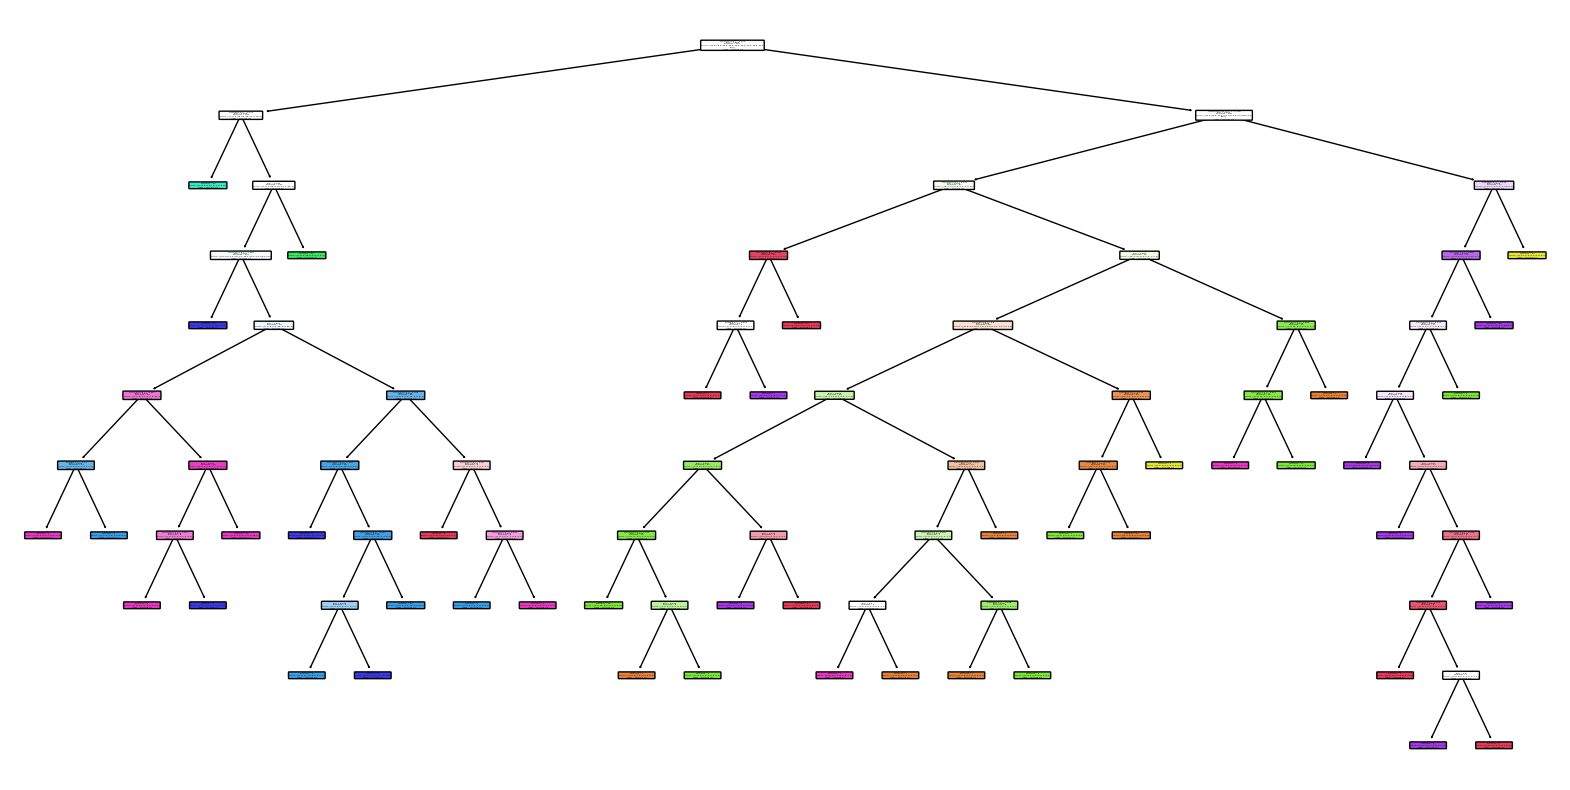

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Usando el dataframe 'df_red_dim' para entrenar el clasificador de árbol de decisión

# Separar las características (X) y la etiqueta (y)
# Asumimos que 'Carpeta' es la etiqueta, y 'Imagen' no es relevante para el modelo
X = df_red_dim.drop(columns=['Carpeta', 'Imagen'])
y = df_red_dim['Carpeta']

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de árbol de decisión
dt_classifier = DecisionTreeClassifier(random_state=42)

# Entrenar el clasificador
dt_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = dt_classifier.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador de Árbol de Decisión: {accuracy:.2f}")



# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.show()



In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Usando el dataframe 'df_red_dim' para entrenar el clasificador KNN con K=5

# Separar las características (X) y la etiqueta (y)
# Asumimos que 'Carpeta' es la etiqueta, y 'Imagen' no es relevante para el modelo
X = df_red_dim.drop(columns=['Carpeta', 'Imagen'])
y = df_red_dim['Carpeta']

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador KNN con K=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador
knn_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn_classifier.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador KNN (K=5): {accuracy:.2f}")


Precisión del clasificador KNN (K=5): 0.94
